# Boston House Pricing Problem:

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as **Crime (CRIM)**, areas of non-retail business in the town **(INDUS)**, the age of people who own the house **(AGE)**, and there are many other attributes that available in it.



![](bh.jpeg)

### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import warnings                                  # Indicates warnings specifically for obsolete module.
warnings.filterwarnings("ignore")                # Read more: https://docs.python.org/3/library/warnings.html

from sklearn.datasets import load_boston    # For loading the dataset.(It is in-built in scikit-learn)

from random import seed
from random import randrange

# For reading the csv file
from csv import reader
 # For complicated Square root problems
from math import sqrt 

# For data manipulation
import pandas as pd                         
import numpy as np

# For data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For using linear regression(prediction)
from sklearn.linear_model import SGDRegressor   ## SGD = stochastic grad. descent

# for using scalers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from numpy import random

# for training and testing of data
from sklearn.model_selection import train_test_split                   
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV   
from sklearn.model_selection import StratifiedKFold                     


CV: changing the training and testing data ratios continuosly.

### Train_test_split: ( 80% = train and 20% = test)

scikit-learn provides a helpful function for partitioning data, train_test_split , which splits out your data into a training set and a test set. We provide the proportion of data to use as a test set and we can provide the parameter **random_state , which is a seed to ensure repeatable results**.  

train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without **specifying random_state , you will get a different result, this is expected behavior**.

### Let's Read the data and see how it Looks.

In [2]:
boston=load_boston()                                                    
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Elements Visible From above trash.

**data**: contains the information for various houses

**target**: prices of the house

**feature_names**: names of the features

**DESCR**: describes the dataset

### Organising The Data

For a human to read and analyse it properly we need to convert this data into a **dataframe** using **Pandas**.

In [4]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)        
boston_data.head()                                                   
#x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Identifying Columns:

In [5]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Features Explanation:

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**PTRATIO**: Pupil-teacher ratio by town

**B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

## Describing The Data:

Description Of the data will provide us every basic mathematical details regarding the data.

In [6]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Normalisation of Data:

The main purpose of **normalization** is to minimize the **redundancy** and remove Insert, Update and Delete Anomaly. It divides larger tables to smaller tables and links them using relationships. Data redundancy happens when the same piece of data is held in two separate place.

In the simplest cases, normalization of ratings means adjusting values measured on **different scales** to a notionally common scale, often prior to averaging. Some types of normalization involve only a rescaling, to arrive at values relative to some size variable.

### SCALING  V/S  NORMALISATION

In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in $scaling$, you're changing the $range$ of your data while in **normalization** you're changing the shape of the **distribution** of your data.

## HOW SCALING IS DONE?

$solution$: Using **Scalers**.

Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. $MinMaxScaler$, $RobustScaler$, $StandardScaler$, and **Normalizer** are scikit-learn methods to preprocess data for machine learning. Which method you need, if any, depends on your model type and your feature values.

### Standard Scaler: (used in this problem)

The idea behind **StandardScaler** is that it will transform your data such that its distribution will have a **mean value 0** and **standard deviation of 1** . Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [7]:
scaler= StandardScaler().fit(x_train)      
x_train= scaler.transform(x_train)                        
x_test= scaler.transform(x_test)  

                                                    

### Ideally:

Standard scaler should give mean =0

In [11]:
print(x_train.mean())
print(x_test.mean())

2.272748602865857e-15
-0.03307416532420048


## Developing a data frame for training data only:

In [29]:
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.416498,-0.470884,-1.242215,-0.244704,-0.965870,2.717928,0.247011,-0.137704,-0.884200,-0.813324,-0.262071,0.449709,-1.244567,38.7
1,-0.389588,-0.470884,1.491518,-0.244704,0.574767,0.304878,1.065696,-0.788055,-0.659581,0.123170,1.224527,0.430023,-0.052406,19.2
2,1.412719,-0.470884,0.946211,-0.244704,0.488697,-1.423651,1.008495,-0.796464,1.586611,1.455201,0.759965,-0.052194,1.696760,12.0


In [30]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## Linear Regression

linear regression is an approach for predicting a **quantitative response** using a **single/multiple feature(s)** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

Here:
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. 

Similarily For Multiple Linear Regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

This is called **multiple linear regression**

![](slope_intercept.png)

### How to apply Linear Regression now?
### Solution = SGDRegressor

SGD stands for **Stochastic Gradient Descent**: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm **L2** or the absolute norm **L1** or a combination of both $(Elastic Net)$. If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

This implementation works with data represented as dense numpy arrays of floating point values for the features.

**Gradient descent** : Gradient descent is a first-order iterative optimization algorithm for finding the **minimum of a function.** To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.


To read more about SGDRegressor and gradient descent refer:https://kite.com/python/docs/sklearn.linear_model.stochastic_gradient.SGDRegressor

![](gd.png)

![](Cost-Function.jpg)

In [31]:
## Basic Structure of SGDRegressor

#  SGDRegressor(
# loss: str=builtins.str,
# penalty: str=builtins.str,
# alpha: float=0.0001,
# l1_ratio: float=0.15,
# fit_intercept: bool=True,
# max_iter: int=1000,
# tol: float=0.001,
# shuffle: bool=True,
# verbose: int=0,
# epsilon: float=0.1,
# random_state: NoneType=None,
# learning_rate: str=builtins.str,
# eta0: float=0.01,
# power_t: float=0.25,
# early_stopping: bool=False,
# validation_fraction: float=0.1,
# n_iter_no_change: int=5,
# warm_start: bool=False,
# average: bool=False
# )

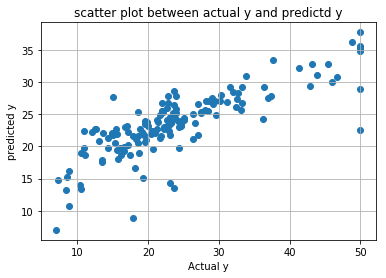

mean squared error: 42.9418661266653
mean Absolute error: 4.853651048520283
R squared 0.5601726836579701


In [32]:
#Sklearn SGD classifier
clf_= SGDRegressor(alpha=0.8,l1_ratio=0.3,eta0=0.04,
                   learning_rate='constant',loss='squared_loss',fit_intercept=True,random_state=10)


clf_.fit(x_train, y_train)  

# Scatter plot command
plt.scatter(y_test,clf_.predict(x_test))     

# for grid lines
plt.grid()                                  

# label and titles(Just like matlab)
plt.xlabel('Actual y')                  
plt.ylabel('predicted y')
plt.title('scatter plot between actual y and predictd y')
plt.show()


print('mean squared error:',mean_squared_error(y_test,clf_.predict(x_test)))
print('mean Absolute error:',mean_absolute_error(y_test,clf_.predict(x_test)))
print('R squared',r2_score(y_test,clf_.predict(x_test)))

In [33]:
coeff=clf_.coef_
coeff

array([-0.23960892,  0.09928655,  0.55695093, -0.41379755, -0.22346783,
        2.25934098,  0.45606934, -1.03719009,  0.30224012, -0.07532755,
       -1.18277506,  0.65481216, -2.41821842])